In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [41]:
LA_df = pd.read_csv('/content/drive/MyDrive/CS506/CS506_FINAL/LA_moon.csv')
Boston_df = pd.read_csv('/content/drive/MyDrive/CS506/CS506_FINAL/Boston_moon.csv')
Chicago_df = pd.read_csv('/content/drive/MyDrive/CS506/CS506_FINAL/Chicago_moon.csv')

## Test different models

In [42]:
# List of dataframes
dataframes = {'LA': LA_df, 'Boston': Boston_df, 'Chicago': Chicago_df}

for city, df in dataframes.items():
    # Prepare data for modeling
    le = LabelEncoder()
    df['Phase_encoded'] = le.fit_transform(df['Phase'])

    # Prepare data for modeling by including 'Month' as an additional feature
    X = df[['Phase_encoded', 'precipitation (mm)', 'wind_speed (mp/h)']]
    y = df['Mean']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_train_predictions = lr_model.predict(X_train)

    lr_mse = mean_squared_error(y_test, lr_predictions)
    lr_r2 = r2_score(y_test, lr_predictions)
    lr_train_r2 = r2_score(y_train, lr_train_predictions)

    print(f"{city} - Linear Regression:")
    print("Train R-squared:", lr_train_r2)
    print("Test Mean Squared Error:", lr_mse)
    print("Test R-squared:", lr_r2)

    # Decision Tree Regression Model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    dt_train_predictions = dt_model.predict(X_train)

    dt_mse = mean_squared_error(y_test, dt_predictions)
    dt_r2 = r2_score(y_test, dt_predictions)
    dt_train_r2 = r2_score(y_train, dt_train_predictions)

    print(f"{city} - Decision Tree Regression:")
    print("Train R-squared:", dt_train_r2)
    print("Test Mean Squared Error:", dt_mse)
    print("Test R-squared:", dt_r2)

    # Random Forest Regression Model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_train_predictions = rf_model.predict(X_train)

    rf_mse = mean_squared_error(y_test, rf_predictions)
    rf_r2 = r2_score(y_test, rf_predictions)
    rf_train_r2 = r2_score(y_train, rf_train_predictions)

    print(f"{city} - Random Forest Regression:")
    print("Train R-squared:", rf_train_r2)
    print("Test Mean Squared Error:", rf_mse)
    print("Test R-squared:", rf_r2)
    print("\n" + "-"*50 + "\n")  # Separator for clarity

LA - Linear Regression:
Train R-squared: 0.08793327899384096
Test Mean Squared Error: 72.59808733887458
Test R-squared: 0.07183198046457329
LA - Decision Tree Regression:
Train R-squared: 0.5876295006044656
Test Mean Squared Error: 79.64565314539908
Test R-squared: -0.0182712913565386
LA - Random Forest Regression:
Train R-squared: 0.5570895791948727
Test Mean Squared Error: 63.75984002868391
Test R-squared: 0.18482915164033886

--------------------------------------------------

Boston - Linear Regression:
Train R-squared: 0.022781458279721334
Test Mean Squared Error: 280.4292193131093
Test R-squared: -0.006509276168577216
Boston - Decision Tree Regression:
Train R-squared: 0.6828226480630772
Test Mean Squared Error: 492.86903746668406
Test R-squared: -0.7689927581783391
Boston - Random Forest Regression:
Train R-squared: 0.5921678491048248
Test Mean Squared Error: 333.79487095890045
Test R-squared: -0.19804788809295437

--------------------------------------------------

Chicago - Li

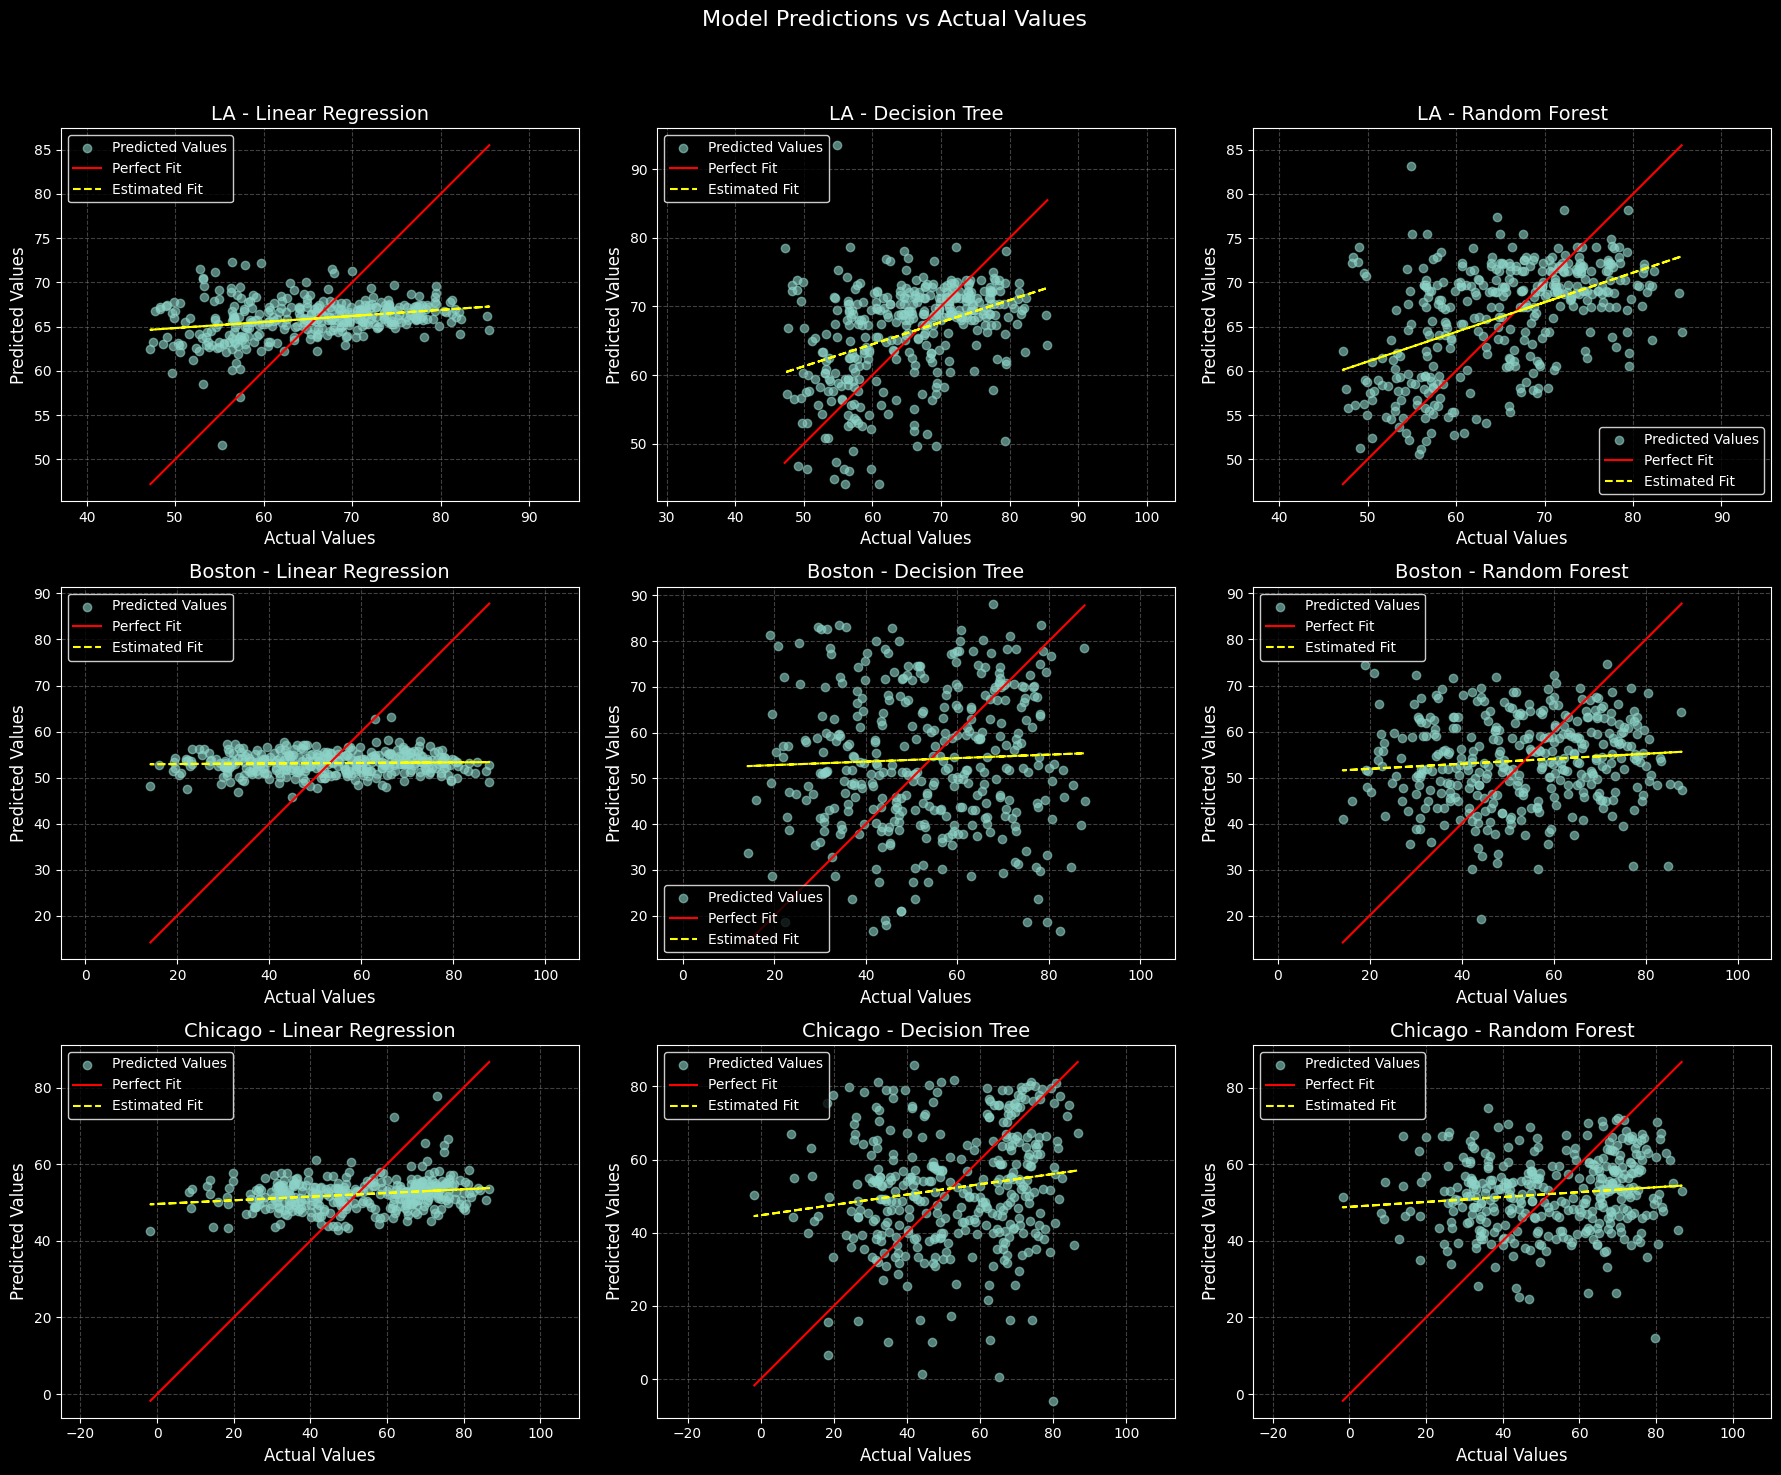

In [48]:
def prepare_and_train_models(df):
    # Prepare data for modeling
    le = LabelEncoder()
    df['Phase_encoded'] = le.fit_transform(df['Phase'])

    # Prepare data for modeling by including 'Month' as an additional feature
    X = df[['Phase_encoded', 'precipitation (mm)', 'wind_speed (mp/h)']]
    y = df['Mean']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models and collect predictions
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)
        predictions[name] = test_predictions

        # Optional: Print performance metrics
        mse = mean_squared_error(y_test, test_predictions)
        r2 = r2_score(y_test, test_predictions)

    return predictions, y_test

# Run the model for each city
results = {}
cities = [LA_df, Boston_df, Chicago_df]
city_names = ['LA', 'Boston', 'Chicago']

for city, name in zip(cities, city_names):
    results[name] = prepare_and_train_models(city)

# Extract predictions and actual values for plotting
predictions_to_plot = {
    'LA': results['LA'][0],
    'Boston': results['Boston'][0],
    'Chicago': results['Chicago'][0],
}
y_tests = {
    'LA': results['LA'][1],
    'Boston': results['Boston'][1],
    'Chicago': results['Chicago'][1],
}

# Now create the plots
# Set the style for night mode
plt.style.use('dark_background')

# Set up the figure and axes for the plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Model Predictions vs Actual Values', fontsize=16, color='white')

# Function to add fit line
def add_fit_line(ax, actual, predicted, color):
    coefficients = np.polyfit(actual, predicted, 1)
    fit_line = np.polyval(coefficients, actual)
    ax.plot(actual, fit_line, color=color, linestyle='--', label='Estimated Fit')

# Model names for easier indexing
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Loop through each city and plot the predictions for each model
for city_idx, city in enumerate(city_names):
    for model_idx, model_name in enumerate(model_names):
        # Get the predictions for the specific city and model
        model_predictions = predictions_to_plot[city][model_name]

        # Create a scatter plot for the predictions
        ax = axes[city_idx, model_idx]
        ax.scatter(y_tests[city], model_predictions, alpha=0.6, label='Predicted Values')
        ax.plot([y_tests[city].min(), y_tests[city].max()], [y_tests[city].min(), y_tests[city].max()], 'r-', label='Perfect Fit')  # Diagonal line
        add_fit_line(ax, y_tests[city], model_predictions, 'yellow')

        ax.set_title(f'{city} - {model_name}', fontsize=14, color='white')
        ax.set_xlabel('Actual Values', fontsize=12, color='white')
        ax.set_ylabel('Predicted Values', fontsize=12, color='white')
        ax.axis('equal')
        ax.legend(facecolor='black', edgecolor='white', fontsize=10)
        ax.tick_params(axis='y', colors='white')
        ax.tick_params(axis='x', colors='white')
        ax.grid(color='gray', linestyle='--', alpha=0.5)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

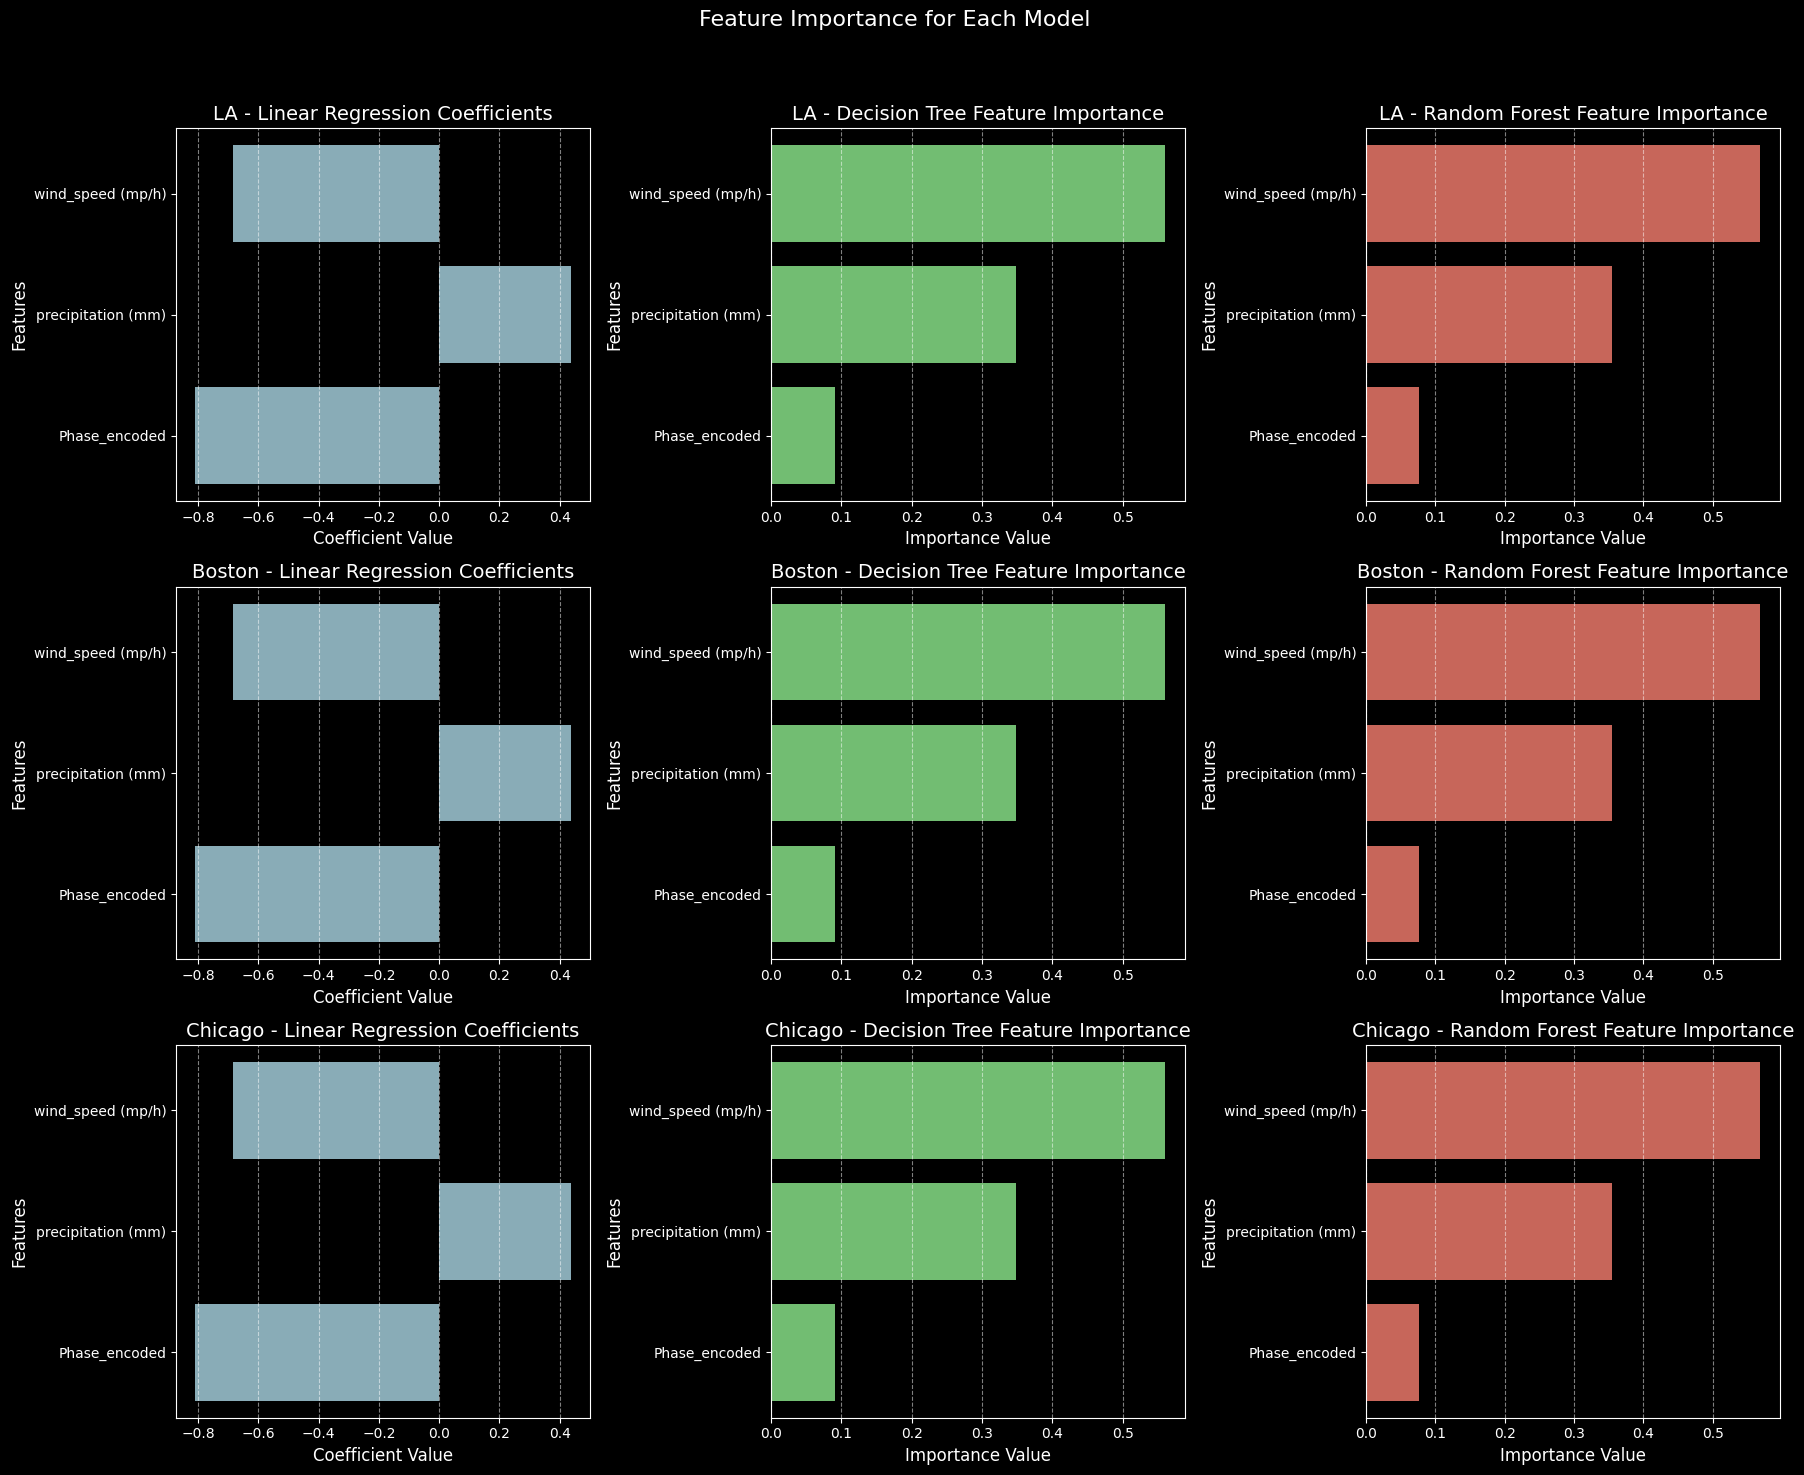

In [50]:
# Set the style for night mode
plt.style.use('dark_background')

# Set up the figure for the feature importance plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Feature Importance for Each Model', fontsize=16, color='white')

# Model names for easier indexing
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Loop through each city and plot the feature importances for each model
for city_idx, city in enumerate(city_names):
    predictions, _ = results[city]

    # Extract the feature importance or coefficients for each model
    lr_model = LinearRegression().fit(X_train, y_train)  # Fit the model again to get coefficients
    dt_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)  # Fit the model again to get importances
    rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)  # Fit the model again to get importances

    # Linear Regression Coefficients
    lr_coefficients = lr_model.coef_
    axes[city_idx, 0].barh(X.columns, lr_coefficients, color='lightblue', alpha=0.8)
    axes[city_idx, 0].set_title(f'{city} - Linear Regression Coefficients', fontsize=14, color='white')
    axes[city_idx, 0].set_xlabel('Coefficient Value', fontsize=12, color='white')
    axes[city_idx, 0].set_ylabel('Features', fontsize=12, color='white')
    axes[city_idx, 0].tick_params(axis='y', colors='white')
    axes[city_idx, 0].tick_params(axis='x', colors='white')
    axes[city_idx, 0].grid(axis='x', linestyle='--', alpha=0.5)

    # Decision Tree Feature Importance
    dt_importance = dt_model.feature_importances_
    axes[city_idx, 1].barh(X.columns, dt_importance, color='lightgreen', alpha=0.8)
    axes[city_idx, 1].set_title(f'{city} - Decision Tree Feature Importance', fontsize=14, color='white')
    axes[city_idx, 1].set_xlabel('Importance Value', fontsize=12, color='white')
    axes[city_idx, 1].set_ylabel('Features', fontsize=12, color='white')
    axes[city_idx, 1].tick_params(axis='y', colors='white')
    axes[city_idx, 1].tick_params(axis='x', colors='white')
    axes[city_idx, 1].grid(axis='x', linestyle='--', alpha=0.5)

    # Random Forest Feature Importance
    rf_importance = rf_model.feature_importances_
    axes[city_idx, 2].barh(X.columns, rf_importance, color='salmon', alpha=0.8)
    axes[city_idx, 2].set_title(f'{city} - Random Forest Feature Importance', fontsize=14, color='white')
    axes[city_idx, 2].set_xlabel('Importance Value', fontsize=12, color='white')
    axes[city_idx, 2].set_ylabel('Features', fontsize=12, color='white')
    axes[city_idx, 2].tick_params(axis='y', colors='white')
    axes[city_idx, 2].tick_params(axis='x', colors='white')
    axes[city_idx, 2].grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
